In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import ElasticNet

# Comparison of Regressors for Real Estate Valuation
In this assignment, the objective is to create both a decision tree regressor and a linear regression model for the Real Estate Valuation dataset and to compare their performance. What is the best algorithm for the dataset?  


In [25]:
data_frame = pd.read_csv('data/realestate.csv').astype('category')
data_frame.head()

,Unnamed: 0,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# Introduction:
In this project i am going to analyze a dataset that aims to predict the house price per unit area based on various features describing the properties. The purpose of this dataset is to identify the relationships between the house attributes (features) and the final price (target) and to build a model capable of accurately predicting house prices. This type of analysis is valuable in the real estate domain for pricing predictions, market analysis, and decision-making  
  
  
The dataset consists of these features:  
    - Transaction Date: When the house was purchased.  
    - House Age: The age of the house at the time of purchase.  
    - Distance to Nearest MRT Station: Proximity to public transportation.  
    - Number of Convenience Stores: Count of nearby convenience stores.  
    - Latitude and Longitude: Geographic location of the house.   
all of these are continious values  
    
The target variable is the house price per unit area, which is continuous, making this a regression problem. 
   
The steps I will follow to identify the best model include:
        1. Analyzing and Preprocessing the Data: Cleaning and preparing the dataset for training  
        2. Splitting the data: Dividing the dataset into training, validation, and testing sets  
        3. Hyperparameter Tuning: I will be using nested grid search to find the best parameters for each model  
        4. Model evaluation: evaluating using accuracy, precision, recall, the f-measure and roc-auc to conclude which is the best model  . 
By following these steps, we can gain deeper insights into the dataset, refine it for modeling, and determine which model: Decision Tree or Linear Regression performs better. This process will help identify the relationships between the features and the target variable and ultimately produce a reliable model for predicting house prices.
  


# Analysis and pre-processing of data:

# removing unecessary columns
I removed the columns NO and Unnamed: 0 because they were only used to assign numbers to each row. These columns do not contribute any meaningful information for predicting the real estate value. Removing unnecessary columns is important to ensure the model focuses on patterns in relevant data, avoiding the risk of learning from irrelevant or misleading features that do not represent the target variable.  
I also made the values numerical from categorical, so the values get recognized as what they are.

In [26]:
data_frame = data_frame.drop('No', axis=1)
data_frame = data_frame.drop('Unnamed: 0', axis=1)
data_frame = data_frame.apply(pd.to_numeric, errors='coerce')

In [27]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


# dataset after removing the columns

In [28]:
data_frame.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# distribution analysis:
looking at the distribution of each feature:  
transaction date: The transaction date shows multiple peaks, suggesting that there were multiple trends or events influencing house purchases over time. This likely indicates a multimodal distribution.     
House age: The house age distribution appears roughly normal, but with a slight left skew, indicating that most of the houses in the dataset are relatively newer.    
Distance to the nearest MRT station: The distance to the nearest MRT station shows a heavy left skew, meaning that the majority of houses are located close to an MRT station.    
number of convinience stores: The distribution of the number of convenience stores shows multiple peaks, which suggests a multimodal distribution.  
latitute and longtitude: Both the latitude and longitude features show distributions that are fairly normal, with a clear peak. This indicates that most of the houses are located in a relatively concentrated area
  
  
Since not all features are normally distributed, scaling the dataset could be beneficial. This would help address features that are skewed or have a multimodal distribution. In particular, models like Linear Regression can benefit from scaling, as it ensures that features with different ranges or distributions are treated equally, leading to better performance and more accurate predictions.

array([[<Axes: title={'center': 'X1 transaction date'}>,
        <Axes: title={'center': 'X2 house age'}>,
        <Axes: title={'center': 'X3 distance to the nearest MRT station'}>],
       [<Axes: title={'center': 'X4 number of convenience stores'}>,
        <Axes: title={'center': 'X5 latitude'}>,
        <Axes: title={'center': 'X6 longitude'}>],
       [<Axes: title={'center': 'Y house price of unit area'}>, <Axes: >,
        <Axes: >]], dtype=object)

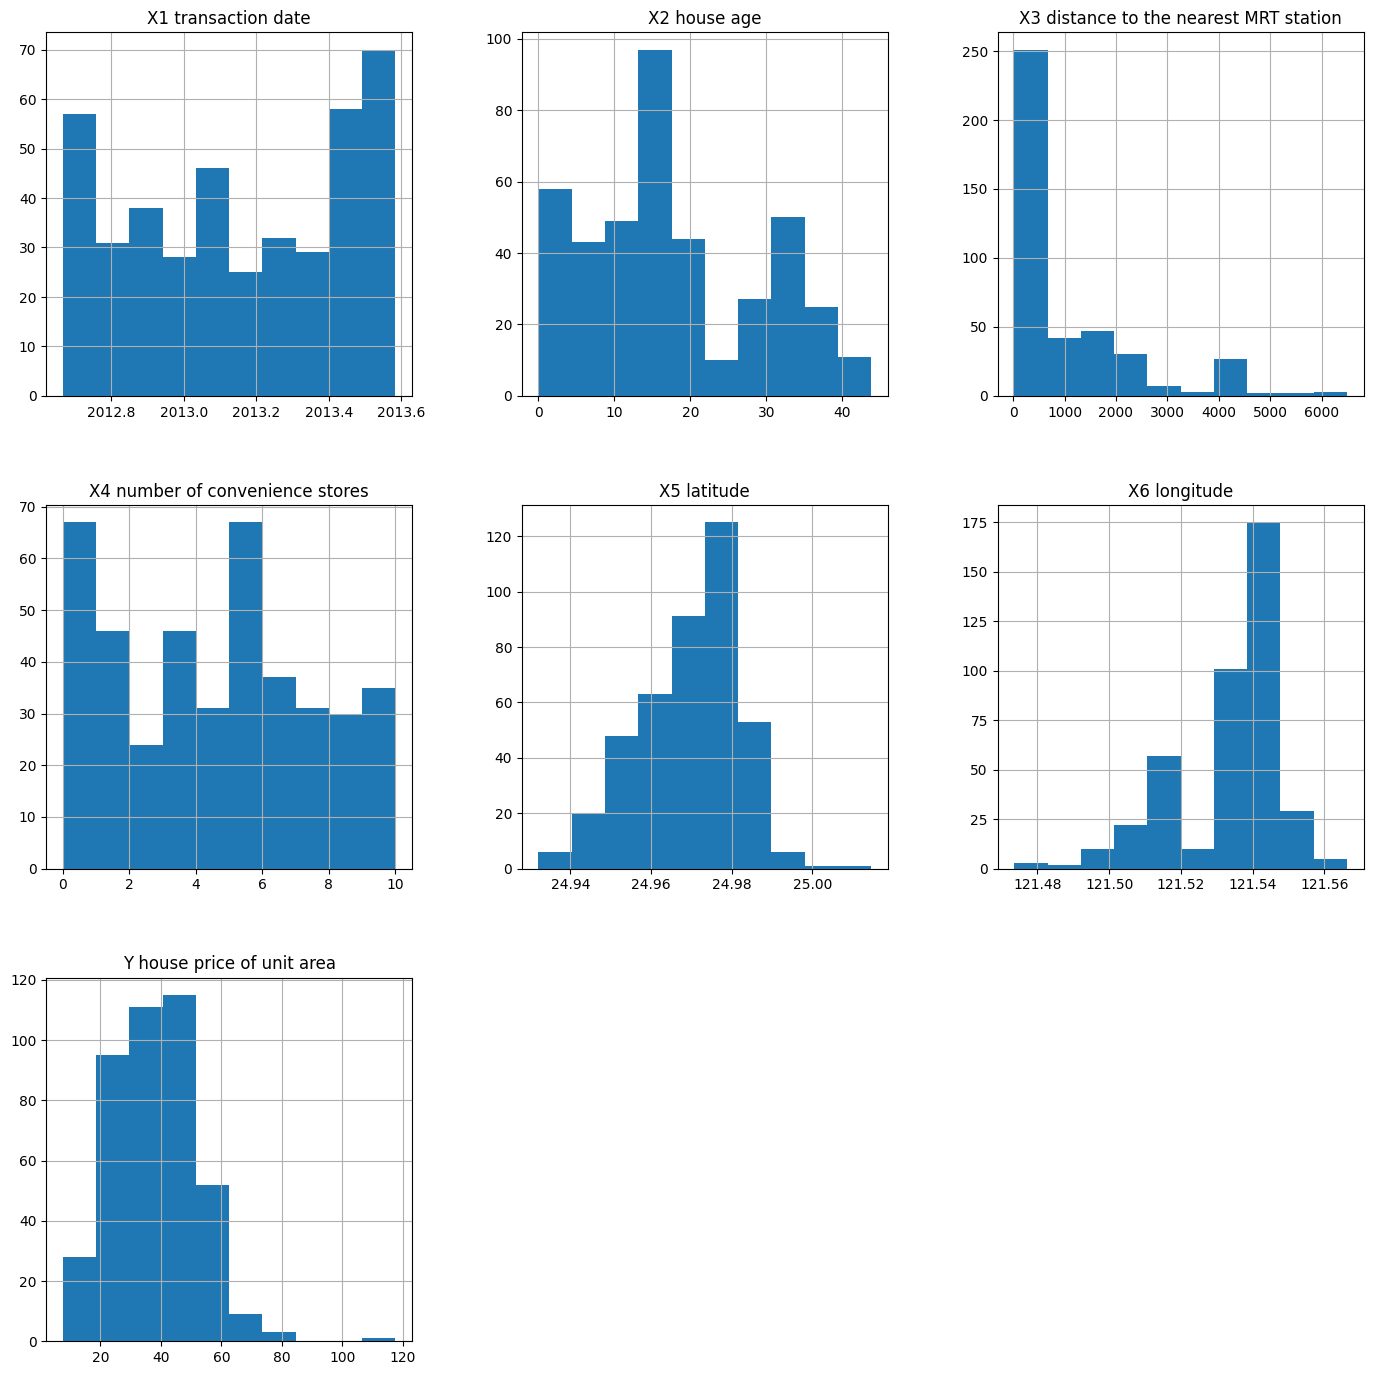

In [29]:
data_frame.hist(figsize=(17, 17))

# pipe with normalization
Since scaling can impact the performance of models, we will incorporate it into a pipeline. This will allow us to evaluate the model's performance with and without scaling, helping us determine whether scaling actually improves the results compared to using the original dataset.

In [30]:
def pipe_scaled(model):
    return Pipeline([('scaler', StandardScaler()), ('regressor', model)])

# correlation analysis
Looking at the correlations in this dataset, we observe that the correlations between the features are generally not very high. Some features, such as X4 (Number of Convenience Stores), X5 (Latitude), and X6 (Longitude), show moderate correlations with each other, with values just over 0.4. This level of correlation is not particularly strong and is unlikely to cause significant issues, so it should not be a major concern for the analysis or modeling process.

In [31]:
data_corr = data_frame.corr()
data_corr.style.background_gradient(cmap='coolwarm')

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
X1 transaction date,1.000000,0.017542,0.060880,0.009544,0.035016,-0.041065,0.087529
X2 house age,0.017542,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,0.009544,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,0.035016,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.041065,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,0.087529,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


from the preprocessing of data we got two alternatives of the dataset:  
original and scaled, we will test both to see which gives better results.

# spliting the data:
I am splitting the data into training-validation and test. The trai_val data will make up 80% of the dataset, while the test data will account for 20%. Since I will be using grid search, the training data will be further divided into training and validation sets at different stages during the grid search process. Once we identify the best model, we can be confident that it is based on the entire training dataset, which helps reduce the risk of overfitting. The train_val data should be the largest section because it needs to be substantial enough to provide sufficient data for training the model, while also allowing for a validation section to monitor the model's progress during training. This is why 80% of the total data is allocated to the train_val set. The test data should also be large enough to effectively evaluate how the model performs on unseen data. Therefore, allocating 20% of the total dataset for testing is typically sufficient.  
  
how the train_val data will be split in nested grid search:  
outer loop(5-cross validation folds):   
    - 80% of the entire dataset is split into five sections  
    - 4/5 (80%) of the train_val data is used for the grid search  
    - 1/5 (20%) of the train_val data is used to evaluate the best model returned from the grid search. which will be unseen data and not used to train the model in the inner loop
inner loop(4-corss validation folds):   
    -In the inner loop, 64% of the entire dataset (which is 80% of the train_val data) is used  for hyperparameter tuning and cross-validation within the grid search process  
    - 3/4 (75%) of the 64% data is used for training the model.
    - 1/4 (25%) of the 64% data is used for validation during the grid search, helping to tune the hyperparameters.  
Since cross-validation is used, the data in the inner and outer loops will be rotated. Each section will be used for both training and validation in different rounds. 

In [32]:
features = data_frame.drop('Y house price of unit area', axis=1)
targets = data_frame['Y house price of unit area']


train_val_features, test_features, train_val_targets, test_target = train_test_split(features, targets, test_size=0.2)


# making the models and parameter tuning
Things to consider when making a model for this kind of regression problem:  
most important: 
   
not overfitted:  
It is important to have a model that is not overfitted, meaning the performance on the training data should not be significantly better than on the validation data/test data. A model that performs well on training data but poorly in practice is not useful in real life scenarios.

high R^2:
A high R² value is important because it indicates that the model can explain a large proportion of the variance in the target variable

low MSE:  
A low MSE means that the model's predictions are close to the actual values on average

also important:  
   
low MAE: 
A low MAE ensures that the model’s predictions are generally close to the true values, with fewer significant mistakes. This is especially useful in scenarios like house pricing, where small errors in predictions are more tolerable than larger ones.  
  
  
Hyperparameter tuning:  
i will be using nested grid search to find the best model of each model type. This is the optimal way to find the best parameters since it will test every parameter combination multiple times. 

# function to evaluate
used to measure the different metrics

In [57]:
def evaluate(estimator, X, y):
    predictions = estimator.predict(X)
    return {
        'r2': r2_score(y, predictions), 
        'mean_absolute_error': mean_absolute_error(y, predictions), 
        'mean_squared_error': mean_squared_error(y, predictions)
    }

# nested grid search function

In [58]:
def find_best_models(model, model_params):
    metrics = ['r2', 'neg_mean_absolute_error', 'neg_mean_squared_error']

    outer_cv = KFold(n_splits=5, shuffle=True, random_state=13)
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=13)

    model_cv_results = []
    model_estimators = []
    model_test_scores = {
        'r2': [],
        'mean_absolute_error': [],
        'mean_squared_error': []
    }

    for (train_index, test_index) in list(outer_cv.split(train_val_features, train_val_targets)):

        dt_grid = GridSearchCV(model, model_params, cv=inner_cv, scoring=metrics, refit='r2',return_train_score=True)
        dt_grid.fit(train_val_features.iloc[train_index], train_val_targets.iloc[train_index])

        cv_results = pd.DataFrame(dt_grid.cv_results_)
        model_cv_results.append(cv_results)
        model_estimators.append(dt_grid.best_estimator_)

        evaluation = evaluate(dt_grid, train_val_features.iloc[test_index], train_val_targets.iloc[test_index])
        model_test_scores['r2'].append(evaluation['r2'])
        model_test_scores['mean_absolute_error'].append(evaluation['mean_absolute_error'])
        model_test_scores['mean_squared_error'].append(evaluation['mean_squared_error'])
    return model_estimators, model_cv_results, model_test_scores



# Decision tree regressor
parameters i will tune, which are the most important:  

The criterion determines how the quality of a split is measured. The Decision Tree Regressor supports the following options:  
    -squared_error: The default criterion. It minimizes the variance within the regions formed by the splits. It is generally the best option for regression problems.  
    - friedman_mse: A variation of the squared error that uses a more efficient algorithm for computing the split. It often works better for large datasets.  
    -absolute_error: Minimizes the sum of absolute differences between the predicted values and the actual values, often making it more robust to outliers than squared error.  
    -poisson: This is used for modeling count-based data. It minimizes the Poisson deviance, which is useful when your target variable is a count (e.g., number of events).  

max_depth: this limits the maximum depth of the tree. Setting a limit on the depth is one of the most effective ways to prevent overfitting. A deeper tree can perfectly fit the training data but may not generalize well to unseen data. 
  
splitter: The splitter defines how the model decides where to split at each node:
    -best: This option selects the best possible split based on the criterion chosen. It finds the optimal split at each node but can lead to deeper trees and potentially overfitting  
    -random: This option randomly selects a subset of features to split on at each node. This can reduce overfitting and speed up training by introducing randomness  


min_samples_split: The min_samples_split defines the minimum number of samples required to split an internal node. Lower values allow the tree to grow deeper, but can become to complex. Higher numbers requires more samples to split a node, which makes the model more general
  
min_samples_leaf: The min_samples_leaf parameter defines the minimum number of samples required at a leaf node. A higher value ensures that each leaf node contains enough samples(underfitting), A lower value might result in small leaf nodes with very few data points(overfitting)
  
max_features: The max_features defines the maximum number of features to consider when looking for the best split. Too many features can lead to overfitting because the model gets more data to work with, too low number of features lead to underfitting and a model that has too little information. 
  
  
The GridSearchCV will help identify the best combination of hyperparameters that perform well on both the training and validation datasets. To ensure that the parameters chosen are optimal, I will also verify that I have selected the correct range of hyperparameters to test. This will be done by plotting the results of each hyperparameter, with each one displayed in its own graph. By doing so, I can visually inspect whether there is a clear peak in the performance metrics, indicating that the range of tested parameters is suitable for achieving the best model performance.

# decision tree regressor with original dataset
i tested different parameter ranges until i found one the ones gave a more clear peak.

In [73]:
dr_params = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'max_depth': range(4,10),
    'min_samples_split': range(2,8),
    'min_samples_leaf': range(4, 10),
    'max_features': range(2,8),
    'splitter': ['best', 'random']
}
best_models_dr, cv_results, model_scores_dr = find_best_models(DecisionTreeRegressor(), dr_params)

# plotting the parameters and scores in each their graph
The selected ranges for max depth, min samples split, min samples leaf, and max features appear to be appropriate. The parameters max depth, min samples split, and min samples leaf show a clear peak, indicating an optimal value within the tested range.
  
For max features, the best results are achieved around 6, which aligns with the total number of features in the dataset.
  
For splitter and criterion, all parameter options are being tested. The splitter performs best when set to "best," as it consistently delivers superior results compared to "random." For criterion, most options yield similar results, except for absolute error, which performs noticeably worse.

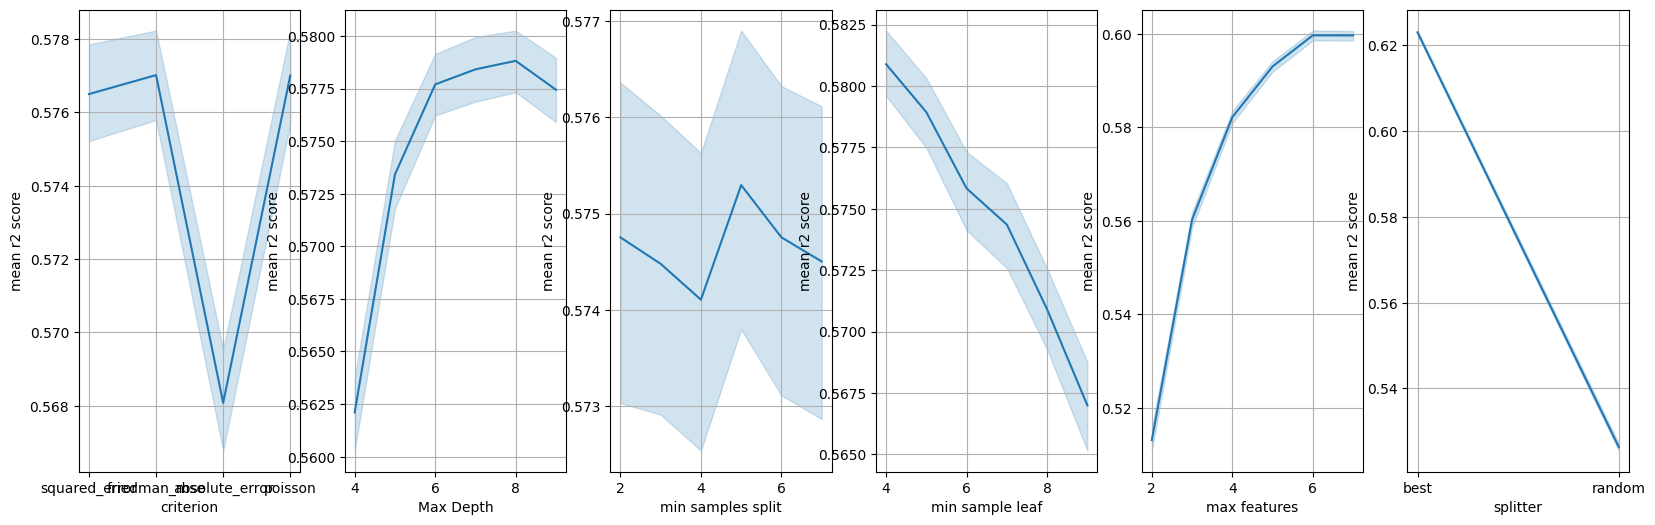

In [74]:
cv_results_df = pd.concat(cv_results, ignore_index=True)

plt.figure(figsize=(20, 6))

plt.subplot(1, 6, 1)
sb.lineplot(data=cv_results_df, x='param_criterion', y='mean_test_r2', estimator='mean')
plt.xlabel('criterion')
plt.ylabel('mean r2 score')
plt.grid()

plt.subplot(1, 6, 2)
sb.lineplot(data=cv_results_df, x='param_max_depth', y='mean_test_r2', estimator='mean')
plt.xlabel('Max Depth')
plt.ylabel('mean r2 score')
plt.grid()

plt.subplot(1, 6, 3)
sb.lineplot(data=cv_results_df, x='param_min_samples_split', y='mean_test_r2', estimator='mean')
plt.xlabel('min samples split')
plt.ylabel('mean r2 score')
plt.grid()

plt.subplot(1, 6, 4)
sb.lineplot(data=cv_results_df, x='param_min_samples_leaf', y='mean_test_r2', estimator='mean')
plt.xlabel('min sample leaf')
plt.ylabel('mean r2 score')
plt.grid()

plt.subplot(1, 6, 5)
sb.lineplot(data=cv_results_df, x='param_max_features', y='mean_test_r2', estimator='mean')
plt.xlabel('max features')
plt.ylabel('mean r2 score')
plt.grid()

plt.subplot(1, 6, 6)
sb.lineplot(data=cv_results_df, x='param_splitter', y='mean_test_r2', estimator='mean')
plt.xlabel('splitter')
plt.ylabel('mean r2 score')
plt.grid()

# the five best models, one from every outer loop

In [77]:
for regressor in best_models_dr:
    print(regressor)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, max_features=5,
                      min_samples_leaf=7, min_samples_split=5)
DecisionTreeRegressor(max_depth=8, max_features=4, min_samples_leaf=4,
                      min_samples_split=4)
DecisionTreeRegressor(criterion='poisson', max_depth=5, max_features=5,
                      min_samples_leaf=4, min_samples_split=3)
DecisionTreeRegressor(criterion='friedman_mse', max_depth=6, max_features=5,
                      min_samples_leaf=5)
DecisionTreeRegressor(max_depth=4, max_features=4, min_samples_leaf=8,
                      min_samples_split=4)


# The best model from the original data
There is some variation in the best models, but overall the following patterns emerge:  
  
Criterion: The best results are consistently achieved with either friedman_mse or the default (squared_error).  
Max Depth: The best values range from 4 to 8. To balance complexity and generalizability, I will choose the median value, which is 5.  
Min Samples Split: The value 4 appears most frequently, making it a reliable choice. If not 4, a nearby value also performs well.  
Min Samples Leaf: Similarly, 4 is the most common value across models and is a good choice to prevent overfitting.  
Max Features: The best results consistently occur with 5, aligning with the total number of features in the dataset.  
Splitter: The default best splitter always yields the best results, so this will remain unchanged.  

In [78]:
best_model_dr_original = DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, min_samples_split=4, min_samples_leaf=4, max_features=5).fit(train_val_features, train_val_targets)
evaluate(best_model_dr_original, test_features, test_target)

{'r2': 0.5523189167194835,
 'mean_absolute_error': 5.965048933361006,
 'mean_squared_error': 103.71398218192978}

# decision tree regressor with scaled data
i am testing with the same parameters, since we already found the optimals

In [82]:
dr_params = {
    'regressor__criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 
    'regressor__max_depth': range(4,10),
    'regressor__min_samples_split': range(2,8),
    'regressor__min_samples_leaf': range(4, 10),
    'regressor__max_features': range(2,8),
    'regressor__splitter': ['best', 'random']
}
best_models_dr_scaled, cv_results, model_scores_dr_scaled = find_best_models(pipe_scaled(DecisionTreeRegressor()), dr_params)

# the five best models, one from every outer loop

In [84]:
for regressor in best_models_dr_scaled:
    print(regressor)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 DecisionTreeRegressor(criterion='poisson', max_depth=6,
                                       max_features=5, min_samples_leaf=9,
                                       min_samples_split=4))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 DecisionTreeRegressor(criterion='friedman_mse', max_depth=7,
                                       max_features=4, min_samples_leaf=4,
                                       min_samples_split=5))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 DecisionTreeRegressor(criterion='poisson', max_depth=7,
                                       max_features=5, min_samples_leaf=5,
                                       min_samples_split=5))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 DecisionTreeRegressor(criterion='friedman

# the best model from the scaled data
criterion: friedman_mse occurs most often
max_depth: 7 occurs the most  
min_samples_leaf: 7 is the number in the middel of the occuring: 9, 4, 5, 8,  
min_samples_split: 5 is the most occuring number
max_features: 5 and 4 occur an equal amount of time, i will say 4 since there is also a 2.
splitter: always 'best' which is the default is the best.

In [86]:
best_model_dr_scaled = pipe_scaled(DecisionTreeRegressor(criterion='friedman_mse', max_depth=7, min_samples_leaf=7, min_samples_split=5, max_features=5)).fit(train_val_features, train_val_targets)
evaluate(best_model_dr_scaled, test_features, test_target)

{'r2': 0.5534081733059112,
 'mean_absolute_error': 5.787013970230854,
 'mean_squared_error': 103.46163482481458}

# Comparing the results of the datasets
we can se that the scaled data is a little bit better then the original, and will continue with this in the final comparison

# linear regression
the regular linear regression model dosen't have any parameters to tune, so i will instead use ElasticNet instead. This will allow me to make small adjustments to lower overfitting
parameters i will tune:  
  
alpha: Controls the strength of regularization. Higher values increase regularization (reduce overfitting), while lower values reduce it, possibly leading to overfitting.
  
l1_ratio: Balances between Lasso (L1) and Ridge (L2) regularization. 1 is Lasso, 0 is Ridge, and values in between combine both, allowing for a balance between sparsity and stability in the model.

since there only are two parameters i am going to try to parameter tune with a wide range of parameters


# linear regression with original data

In [91]:
linear_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.9, 1.0]

}
best_models_linear, cv_results, model_scores_linear = find_best_models(ElasticNet(), linear_params)

# plotting the parameters and scores in each their graph
a clear peak for alpha was found at 0.1, the same with l1_ratio at 0.1.

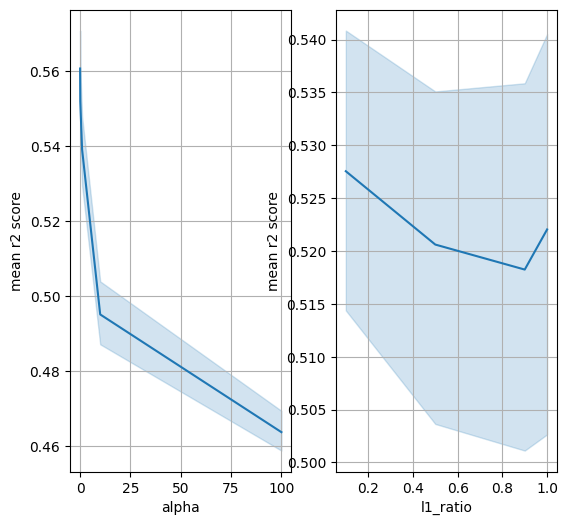

In [92]:
cv_results_df = pd.concat(cv_results, ignore_index=True)

plt.figure(figsize=(20, 6))

plt.subplot(1, 6, 1)
sb.lineplot(data=cv_results_df, x='param_alpha', y='mean_test_r2', estimator='mean')
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.grid()

plt.subplot(1, 6, 2)
sb.lineplot(data=cv_results_df, x='param_l1_ratio', y='mean_test_r2', estimator='mean')
plt.xlabel('l1_ratio')
plt.ylabel('mean r2 score')
plt.grid()

# all of the best models

In [93]:
for regressor in best_models_linear:
    print(regressor)

ElasticNet(alpha=0.01, l1_ratio=1.0)
ElasticNet(alpha=0.01, l1_ratio=1.0)
ElasticNet(alpha=0.01, l1_ratio=1.0)
ElasticNet(alpha=0.01, l1_ratio=1.0)
ElasticNet(alpha=0.01, l1_ratio=1.0)


# the overall best model

In [94]:
best_elastic_model = best_models_linear[0]
evaluate(best_elastic_model, test_features, test_target)

{'r2': 0.4970583819584693,
 'mean_absolute_error': 6.213473889413512,
 'mean_squared_error': 116.51615393234194}

# linear regression with scaled data
i am testing with the same parameters, since we already found the optimals

In [ ]:
linear_params = {
    'regressor__alpha': [0.01, 0.1, 1, 10, 100],
    'regressor__l1_ratio': [0.1, 0.5, 0.9, 1.0]

}
best_models_linear_scaled, cv_results, model_scores_linear_scaled = find_best_models(pipe_scaled(ElasticNet()), linear_params)

# the five best models found

In [97]:
for regressor in best_models_linear_scaled:
    print(regressor)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.1))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.1))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=0.1))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.1))])
Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', ElasticNet(alpha=0.1, l1_ratio=0.1))])


# the best model overall

In [98]:
best_model_linear_scaled = best_models_linear_scaled[0]
evaluate(best_model_linear_scaled, test_features, test_target)

{'r2': 0.4827330103310231,
 'mean_absolute_error': 6.340298014375278,
 'mean_squared_error': 119.83490335733723}

# Comparing the results of the datasets
we can se that the original data is almost the same, maybe a little bit better. will continue with this in the final comparison

# looking at the overall results from the five best models
we can see that the models don't have that much difference in results overall

In [101]:
print("results from decision tree regressor")
print(model_scores_dr_scaled)
print("results from linear regressor")
print(model_scores_linear)

results from decision tree regressor
{'r2': [0.4036143248355629, 0.5365318647877655, 0.661489636653388, 0.6772939457995344, 0.6521890592689146], 'mean_absolute_error': [7.632025704231627, 6.500045738316434, 6.485024788544948, 5.515739310395933, 5.471606798086597], 'mean_squared_error': [104.37929864076584, 82.40364813457978, 70.38707221559744, 43.74455474924676, 49.00595232093881]}
results from linear regressor
{'r2': [0.40560725454167845, 0.5312799028447657, 0.6484367211456163, 0.6765600309747211, 0.6584620177139595], 'mean_absolute_error': [7.456539285982814, 6.545520410392965, 6.456107740661515, 5.5367281968103, 5.540274826888878], 'mean_squared_error': [104.03049649204331, 83.33743579134925, 73.10118854984057, 43.844040881649434, 48.12210346378978]}


# comparing results of the best models
function to print out the different metric results

In [ ]:
def evaluate_final_comparison(model):
    prediction_train = model.predict(train_val_features)
    prediction_test = model.predict(test_features)

    print(f"Training R2: {r2_score(train_val_targets, prediction_train)}")
    print(f"Training MSE: {mean_squared_error(train_val_targets, prediction_train)}")
    print(f"Training MAE: {mean_absolute_error(train_val_targets, prediction_train)}")
    print()
    print(f"Test R2: {r2_score(test_target, prediction_test)}")
    print(f"Test MSE: {mean_squared_error(test_target, prediction_test)}")
    print(f"Test MAE: {mean_absolute_error(test_target, prediction_test)}")
    print()


    

In [113]:
print("final evaluation of the best models found: ")
print()
print("Decision tree regressor with scaled data:")
evaluate_final_comparison(best_model_dr_scaled)
print("Linear regressor with orignal data:")
evaluate_final_comparison(best_elastic_model)

final evaluation of the best models found: 

Decision tree regressor with scaled data:
Training R2: 0.8282089683633951
Training MSE: 29.593535958005177
Training MAE: 3.9275473157270073

Test R2: 0.5534081733059112
Test MSE: 103.46163482481458
Test MAE: 5.787013970230854

Linear regressor with orignal data:
Training R2: 0.601002907972134
Training MSE: 68.73312697163047
Training MAE: 6.189335768096302

Test R2: 0.4970583819584693
Test MSE: 116.51615393234194
Test MAE: 6.213473889413512



# vizuallizing the results
this plot shows predicted values (Y-axis) versus the ground-truth data (X-axis). The green line indicate what would be perfect correlation

# best decision tree regressor

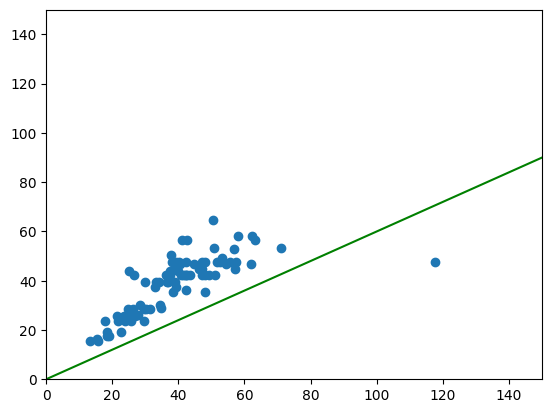

In [112]:
plt.scatter(test_target, best_model_dr_scaled.predict(test_features))
plt.plot([0, 250], [0, 150], c='green')
plt.axis((0, 150, 0, 150))
plt.show()

# best linear regressor

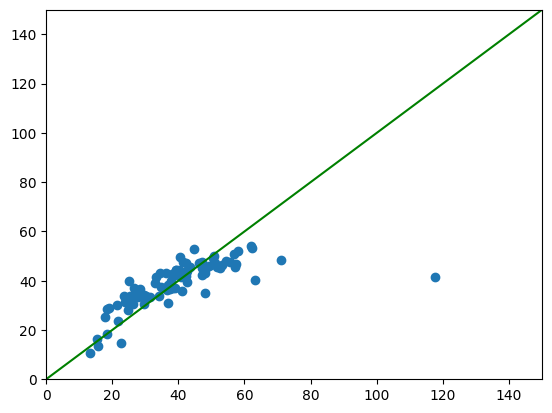

In [105]:
plt.scatter(test_target, best_elastic_model.predict(test_features))
plt.plot([0, 150], [0, 150], c='green')
plt.axis((0, 150, 0, 150))
plt.show()

# Evaluating the results:  
looking at the metric results:  
    Decision Tree Regressor: 
         The decision tree model shows some signs of overfitting, with better performance on the training set compared to the validation and test sets. The high R^2 value on the training set suggests that the model explains a large proportion of the variance in the training data, but this value decreases when applied to unseen data (test set). Similarly, the training MSE and MAE are lower, but they increase on the test set, indicating a decline in prediction accuracy for new, unseen data. the test scores are stil a bit better then the linear regressor.  
         the model explained 55% of the predictions, 103 is the the average of the squared differences between the actual and predicted values and the model's predictions are off by about 5.79 units  
    Linear Regressor:  
        The linear regression model (ElasticNet) also exhibits some overfitting, as the R^2, MSE, and MAE values are slightly better on the training data compared to the test data. However, the difference between training and test results is relatively smaller than in the decision tree model, suggesting that linear regression generalizes a bit better to new data. the model explained 50% of the predictions, 116 is the the average of the squared differences between the actual and predicted values and the model's predictions are off by about 6 units  
  
Outer Loop Results Comparison:  
When comparing the results from the outer loop, the performance of both models—decision tree and linear regression—was quite close across all metrics.
  
looking at the prediction plot:   
The prediction plot gives us a different perspective. The linear regressor (ElasticNet) appears to make predictions closer to the ideal line compared to the decision tree, which indicates that the linear model had better prediction consistency.
  
  
Conclusion:  
From the overall results, including both the performance metrics and the visualization of predictions, ElasticNet (Linear Regression) seems to be the better model in this case. It exhibits more stable performance, with predictions closer to the expected values in the plot. However, it’s important to note that the best-performing model could still be influenced by random variations in the dataset, and neither model was perfect. Both models were moderately good at predicting the target variable, but they are not ideal for all scenarios.

things to consider:  
Hyperparameter Search Space: While we tuned the models using specific parameters, there could still be better configurations beyond the range we tested. Exploring a larger search space might uncover new peaks, leading to improved model performance. it was hard testing a very wide range of paramters without getting a too high run time, so i tested different intervals until i found an appropriate one.
  
randomness in the splits in the final comparison: When comparing the model's performance on training and test data, differences in results might stem from randomness in the data splits, especially in the final comparison. The best model could vary, especially when the differences are that small.


# Sources
Scikit-learn Documentation on DecisionTreeRegressor: Scikit-learn developers. (n.d.). sklearn.tree.DecisionTreeRegressor. Scikit-learn documentation. https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html
  
EITCA - Machine Learning with Python: EITCA. (n.d.). Is linear regression especially well-suited for scaling? EITCA Academy. https://eitca.org/artificial-intelligence/eitc-ai-mlp-machine-learning-with-python/regression/understanding-regression/is-linear-regression-especially-well-suited-for-scaling/
  
Wikipedia on Multimodal Distribution: Wikipedia contributors. (2024, November 30). Multimodal distribution. Wikipedia. https://en.wikipedia.org/wiki/Multimodal_distribution
  
Scikit-learn Documentation on StandardScaler: Scikit-learn developers. (n.d.). sklearn.preprocessing.StandardScaler. Scikit-learn documentation. https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html
  
Scikit-learn Documentation on ElasticNet: Scikit-learn developers. (n.d.). sklearn.linear_model.ElasticNet. Scikit-learn documentation. https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
  
Scikit-learn Documentation on Pipeline: Scikit-learn developers. (2024). sklearn.pipeline.Pipeline. Scikit-learn documentation. https://scikit-learn.org/1.5/modules/generated/sklearn.pipeline.Pipeline.html
